# 4-1 : Logistic Regression

In [ ]:
import pandas as pd

In [ ]:
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
pd.unique(fish["Species"])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
fish_input = fish.iloc[:, 1:]
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_target = fish.iloc[:, 0]
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_input)

train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

## 다중 클래스 분류 -> KNN Classifier : 가장 가까운 이웃 k개를 이용해 판단.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(train_scaled, train_target)

knc.score(train_scaled, train_target), knc.score(test_scaled, test_target)

(0.8907563025210085, 0.85)

In [ ]:
knc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
knc.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [ ]:
import numpy as np

In [ ]:
prob = knc.predict_proba(test_scaled[:5])
np.round(prob, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

## Sigmoid (Logistic Function)

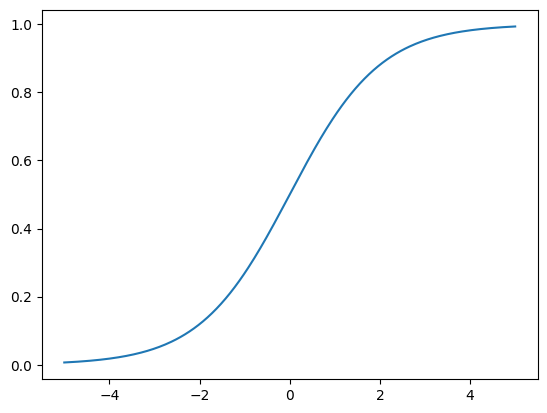

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 300)
sig = 1 / (1 + np.exp(-x))

plt.plot(x, sig)
plt.show()

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
char_arr[[True, False, True, False, False]]

array(['A', 'C'], dtype='<U1')

### Set datas for logistic classification

In [ ]:
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_scaled_bs = train_scaled[bream_smelt_indexes]
train_target_bs = train_target[bream_smelt_indexes]

bream_smelt_indexes = (test_target == "Bream") | (test_target == "Smelt")
test_scaled_bs = test_scaled[bream_smelt_indexes]
test_target_bs = test_target[bream_smelt_indexes]

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression()
lrg.fit(train_scaled_bs, train_target_bs)

lrg.predict(test_scaled_bs[:5])

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [ ]:
lrg.score(train_scaled_bs, train_target_bs), lrg.score(test_scaled_bs, test_target_bs)

(1.0, 1.0)

In [ ]:
lrg.predict_proba(test_scaled_bs[:5])

array([[3.95944090e-02, 9.60405591e-01],
       [9.99418782e-01, 5.81218253e-04],
       [2.57876208e-02, 9.74212379e-01],
       [9.94094581e-01, 5.90541862e-03],
       [9.93801676e-01, 6.19832389e-03]])

In [ ]:
lrg.classes_

array(['Bream', 'Smelt'], dtype=object)

In [ ]:
lrg.coef_, lrg.intercept_

(array([[-0.40451732, -0.57582787, -0.66248158, -1.01329614, -0.73123131]]),
 array([-2.16172774]))

In [ ]:
decision = lrg.decision_function(test_scaled_bs[:5])
decision, 1 / (1 + np.exp(-1 * decision))

(array([ 3.18866777, -7.44980283,  3.63173477, -5.12596201, -5.07725875]),
 array([9.60405591e-01, 5.81218253e-04, 9.74212379e-01, 5.90541862e-03,
        6.19832389e-03]))

## Multi-class classification with Logistic Regression

In [ ]:
lrg = LogisticRegression(C=20, max_iter=1000)
lrg.fit(train_scaled, train_target)

lrg.score(train_scaled, train_target), lrg.score(test_scaled, test_target)

(0.9327731092436975, 0.925)

In [ ]:
prob = lrg.predict_proba(test_scaled[:5])
np.round(prob, decimals=3)

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [ ]:
lrg.coef_.shape, lrg.intercept_.shape

((7, 5), (7,))

In [ ]:
decision = lrg.decision_function(test_scaled[:5])
np.round(decision, decimals=3)

array([[ -6.507,   1.039,   5.168,  -2.757,   3.337,   0.346,  -0.625],
       [-10.879,   1.944,   4.776,  -2.423,   2.987,   7.842,  -4.247],
       [ -4.338,  -6.237,   3.167,   6.481,   2.364,   2.434,  -3.872],
       [ -0.691,   0.446,   2.643,  -1.215,   3.261,  -5.701,   1.257],
       [ -6.401,  -1.991,   5.815,  -0.135,   3.499,  -0.088,  -0.699]])

In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

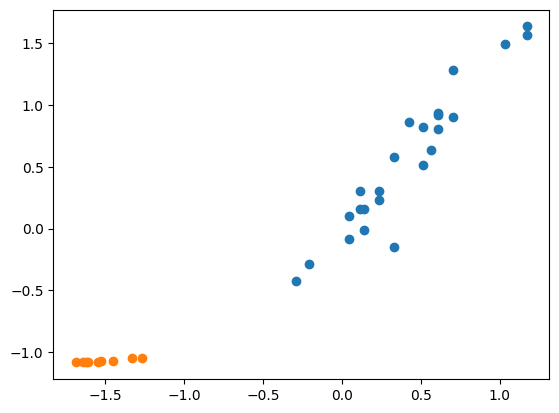

In [ ]:
import matplotlib.pyplot as plt

breams_indexes = (train_target == "Bream")
smelt_indexes = (train_target == "Smelt")
bream_scaled = train_scaled[breams_indexes]
smelt_scaled = train_scaled[smelt_indexes]

plt.scatter(bream_scaled[:, 1], bream_scaled[:, 0])
plt.scatter(smelt_scaled[:, 1], smelt_scaled[:, 0])
plt.show()

# 4_second

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('https://bit.ly/fish_csv_data')
data.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [7]:
fish_input = data.iloc[:, 1:]
fish_target = data.iloc[:, 0]
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
from sklearn.linear_model import SGDClassifier

In [16]:
sc = SGDClassifier(loss="log_loss", max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

sc.score(train_scaled, train_target), sc.score(test_scaled, test_target)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.773109243697479, 0.775)

## 점진적 학습

In [17]:
sc.partial_fit(train_scaled, train_target)

sc.score(train_scaled, train_target), sc.score(test_scaled, test_target)

(0.7983193277310925, 0.775)

## Epochs

In [18]:
import numpy as np

In [24]:
sc = SGDClassifier(loss="log_loss", random_state=42)

train_scores = []
test_scores = []

classes = np.unique(train_target)

In [25]:
for epoch in range(300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_scores.append(
      sc.score(train_scaled, train_target)
  )
  test_scores.append(
      sc.score(test_scaled, test_target)
  )

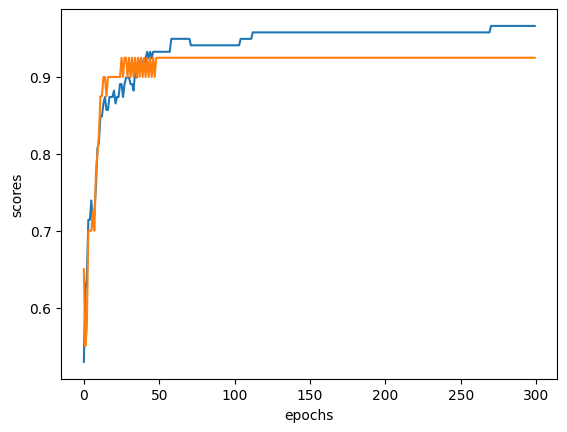

In [26]:
import matplotlib.pyplot as plt

plt.plot(train_scores)
plt.plot(test_scores)
plt.xlabel("epochs")
plt.ylabel("scores")
plt.show()

이 경우 100번 정도의 epoch가 이 모델이 적당함.

In [27]:
sc = SGDClassifier(loss="log_loss", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

sc.score(train_scaled, train_target), sc.score(test_scaled, test_target)

(0.957983193277311, 0.925)

In [28]:
sc = SGDClassifier(loss="hinge", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

sc.score(train_scaled, train_target), sc.score(test_scaled, test_target)

(0.9495798319327731, 0.925)